# Tokenization & Text Processing In NLP By Neuraldemy
This tutorial is part of Neuraldemy's in depth tutorial on NLP. This notebook contains discussion regarding how we can deal with our text corpus and other preprocessing steps. This also includes the details on various tokenization schemes avaliable such as BPE etc. 
___
**Author**: Amritesh Kumar, Neuraldemy  
**Course**: Natural Language Processing   
**Notebook No**: 01   
**Website**: https://neuraldemy.com/    
___

Readers are expected to have gone through the theory discussed in our free NLP tutorial. 

### Basic Tokenization: 
The simplest way to tokenize our corpus is by returning the output in this manner: 

In [20]:
text = """The simplest way to tokenize our corpus is by returning the output in this manner"""

def basic_tokenizer(text):
    tokens = text.split()
    return tokens           

In [21]:
basic_tokenizer(text)

['The',
 'simplest',
 'way',
 'to',
 'tokenize',
 'our',
 'corpus',
 'is',
 'by',
 'returning',
 'the',
 'output',
 'in',
 'this',
 'manner']

Now the problem with this approach is our tokenizer won't be able to deal with many things such as punctuation, special characters, or multi-word expressions. Let me show you some limitations:

In [22]:
text1 =  "I love natural language processing, don't you?"
ex1 = basic_tokenizer(text1)
print("Example 1:", ex1)

text2 = "The cat sat on the Mat."
text3 = "the CAT SAT ON the mat."
print("Example 2:", basic_tokenizer(text2), basic_tokenizer(text3))

text4 = "It's raining cats and dogs."
print("Example 3:", basic_tokenizer(text4))

text5 = "Visit us at https://example.com or email us at info@example.com."
print("Example 4:", basic_tokenizer(text5))

text6 = """def basic_tokenizer(text):
                tokens = text.split() 
                return tokens"""
print("Example 5:", basic_tokenizer(text6))

Example 1: ['I', 'love', 'natural', 'language', 'processing,', "don't", 'you?']
Example 2: ['The', 'cat', 'sat', 'on', 'the', 'Mat.'] ['the', 'CAT', 'SAT', 'ON', 'the', 'mat.']
Example 3: ["It's", 'raining', 'cats', 'and', 'dogs.']
Example 4: ['Visit', 'us', 'at', 'https://example.com', 'or', 'email', 'us', 'at', 'info@example.com.']
Example 5: ['def', 'basic_tokenizer(text):', 'tokens', '=', 'text.split()', 'return', 'tokens']


The problem in above examples are as explained below:
1. The tokenizer splits the text only based on whitespace.This means "processing," is not split into "processing" and ",".
2. The tokenizer does not handle case normalization, treating words with different cases as different tokens.  "The" and "the" are treated as separate tokens.
3. In this example, in many cases you want to sepearate the terms It's as It and 's. 
4. URLs are being treated as single token which many not be suitable for many cases. We can use regex to identify the parts of those URLs.
5. What if our corpus contains codes? We may not be able to take the code structure in account properly. 

So, it seems like our basic tokenizer is not good enough. We need more sophiticated way to tokenize our text corpus. One thing I have mentioned several times in my tutorial, tokenization is task specific requirement and can be done in many ways.

Before we come to some advanced techniques to tokenize our corpus, let's see a tool that can help us analyse our text corpus. We will be using **NLTK library**. 

### NLTK
NLTK is a natural language processing tooklit that allows us to do a lot of things. We will be using this tool for various tasks. Let's see some of it's methods on a text corpus. There are so many corpus available in NLTK that you can use in your practice projects. Check the link here: https://www.nltk.org/book/ch02.html

In [23]:
import nltk
from nltk.corpus import gutenberg
from nltk import FreqDist

# get the books ids and choose any one corpus for analysis
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [24]:
# this is the raw text from the book without any tokenization.
text = gutenberg.raw("austen-emma.txt")
text[:400]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence o'

NLTK offers various tokenizer that we can use to tokenize our corpus

In [25]:
from nltk.tokenize import WhitespaceTokenizer, word_tokenize, WordPunctTokenizer, RegexpTokenizer, TreebankWordTokenizer, sent_tokenize

# Whitespace Tokenizer - Similar to what we have seen
print("-------- Whitespace Tokenizer --------")
whitespace_tokenizer = WhitespaceTokenizer()
whitespace_tokens = whitespace_tokenizer.tokenize(text)
print("Tokens:", whitespace_tokens[:10])

# Word Tokenizer - This tokenizer splits the text into words based on punctuation and whitespace.
print("\n-------- Word Tokenizer --------")
word_tokens = word_tokenize(text)
print("Tokens:", word_tokens[:10])

# WordPunct Tokenizer - Splits the text into words based on punctuation and whitespace, treating punctuation as separate tokens.
print("\n-------- WordPunct Tokenizer --------")
wordpunct_tokenizer = WordPunctTokenizer()
wordpunct_tokens = wordpunct_tokenizer.tokenize(text)
print("Tokens:", wordpunct_tokens[:10])

# Regexp Tokenizer - This tokenizer allows you to define a regular expression to specify how to split the text.
print("\n-------- Regexp Tokenizer --------")
regexp_tokenizer = RegexpTokenizer(r'\w+')
regexp_tokens = regexp_tokenizer.tokenize(text)
print("Tokens:", regexp_tokens[:10])

# Sentence Tokenizer - Splits text into sentences using an algorithm described in Kiss and Strunk (2006)
print("\n-------- Sentence Tokenizer --------")
sentences = sent_tokenize(text)
print("Sentences:", sentences[:3])

-------- Whitespace Tokenizer --------
Tokens: ['[Emma', 'by', 'Jane', 'Austen', '1816]', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma']

-------- Word Tokenizer --------
Tokens: ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

-------- WordPunct Tokenizer --------
Tokens: ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

-------- Regexp Tokenizer --------
Tokens: ['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma']

-------- Sentence Tokenizer --------
Sentences: ['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress 

Total number of samples: 191673
The 50 most common samples and their frequencies:
[(',', 12016), ('.', 6355), ('to', 5124), ('the', 4842), ('and', 4652), ('of', 4272), ('I', 3164), ('--', 3100), ('a', 3001), ("''", 2452), ('was', 2383), ('her', 2360), (';', 2353), ('not', 2242), ('in', 2103), ('it', 2101), ('be', 1965), ('she', 1774), ('``', 1735), ('that', 1728), ('you', 1662), ('had', 1605), ('as', 1387), ('he', 1365), ('for', 1320), ('have', 1301), ('is', 1221), ('with', 1185), ('very', 1151), ('but', 1148), ('Mr.', 1089), ('his', 1084), ('!', 1063), ('at', 996), ('so', 918), ("'s", 866), ('Emma', 855), ('all', 831), ('could', 824), ('would', 813), ('been', 755), ('him', 748), ('on', 674), ('Mrs.', 668), ('any', 651), ('?', 621), ('my', 619), ('no', 615), ('Miss', 590), ('were', 590)]
Sample with the greatest count: ,
Frequency distribution:
    ,     .    to   the   and    of     I    --     a    '' 
12016  6355  5124  4842  4652  4272  3164  3100  3001  2452 


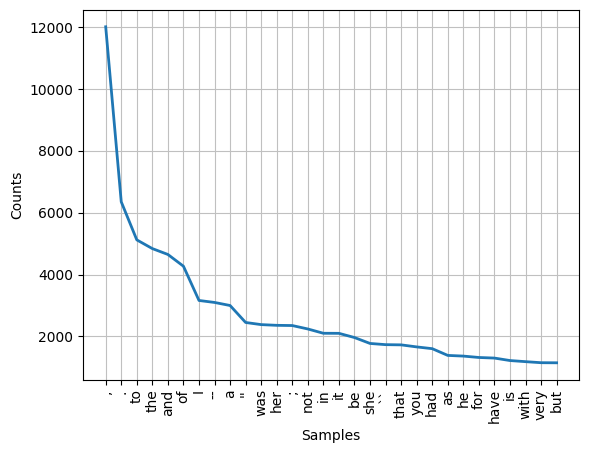

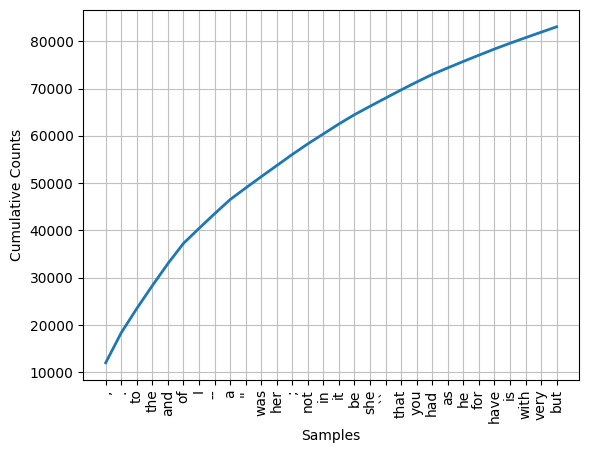

In [26]:
# Let's use word tokens to analyse some stats

# Create a frequency distribution
fdist = FreqDist(word_tokens)

# Total number of samples
print("Total number of samples:", fdist.N())

# The 50 most common samples and their frequencies
print("The 50 most common samples and their frequencies:")
print(fdist.most_common(50))

# Sample with the greatest count
print("Sample with the greatest count:", fdist.max())

# Tabulate the frequency distribution
print("Frequency distribution:")
fdist.tabulate(10)

# Graphical plot of the frequency distribution
fdist.plot(30, cumulative=False)

# Cumulative plot of the frequency distribution
fdist.plot(30, cumulative=True)

As you can see the most common words are basic english words but the most important one is "Emma". What about rare words? 

In [27]:
# Rare words - these words occur only once in the corpus. I have printed only first 50
print("Rare words:", fdist.hapaxes()[:50])

Rare words: ['Austen', '1816', 'twenty-one', 'vex', 'indistinct', 'caresses', 'nominal', 'mildness', 'impose', 'esteeming', 'disadvantages', 'misfortunes', 'Sorrow', 'consciousness.', 'mournful', 'bride-people', 'self-denying', 'debt', 'tenderer', 'valetudinarian', 'amounting', 'equals', 'lieu', 'awoke', 'Matrimony', 'chatted', 'large.', 'housemaid', 'pretty-spoken', 'curtseys', 'needlework', 'lock', 'bangs', 'backgammon', 'backgammon-table', 'eight-and-thirty', 'Dirty', 'speck', 'rained', 'Especially', 'gainer', 'punctual', 'widower', 'deathbed', 'Broadway', 'drizzle', 'Farmer', 'Mitchell', 'Success', 'supposes']


In [28]:
# Vocabulary or unique words can be found using 
V = set(word_tokens)
len(V)

8467

In [29]:
# You can also find ngrams etc using NLTK
from nltk.util import ngrams

# Unigrams
unigrams = list(ngrams(word_tokens, 1))

# Bigrams
bigrams = list(ngrams(word_tokens, 2))

# Trigrams
trigrams = list(ngrams(word_tokens, 3))

# Print examples of unigrams, bigrams, and trigrams
print("Examples of Unigrams:", unigrams[:5])
print("Examples of Bigrams:", bigrams[:5])
print("Examples of Trigrams:", trigrams[:5])

Examples of Unigrams: [('[',), ('Emma',), ('by',), ('Jane',), ('Austen',)]
Examples of Bigrams: [('[', 'Emma'), ('Emma', 'by'), ('by', 'Jane'), ('Jane', 'Austen'), ('Austen', '1816')]
Examples of Trigrams: [('[', 'Emma', 'by'), ('Emma', 'by', 'Jane'), ('by', 'Jane', 'Austen'), ('Jane', 'Austen', '1816'), ('Austen', '1816', ']')]


You can use this approach to create ngrams from your text corpus. NLTK really shines here! Or you can also create your own function:

```def generate_ngrams(tokens, n):
    ngrams_list = []
    for i in range(len(tokens) - n + 1):
        ngram = tuple(tokens[i:i + n])
        ngrams_list.append(ngram)
    return ngrams_list```

### Text Processing

Now, there are other ways to important our text corpus such as local files, blog posts, RSS feeds, web pages etc. To do that, we need to first find a way to get the information we are interested in, create a raw text format, and then convert it into tokens for further analysis.

In [30]:
# Processing Raw Text from the Web:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt" 

response = request.urlopen(url)
raw = response.read().decode("utf8")
raw[:75]

'\ufeffThe Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [31]:
# Another way to do the same thing is using requests lib
import requests
response2 = requests.get(url)
raw = response2.content.decode('utf8')
raw[:75]

'\ufeffThe Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [32]:
# Dealing with HTML in URLs
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Main_Page"
response = requests.get(url)
html = response.content

soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()
text[:1000]

'\n\n\n\nWikipedia, the free encyclopedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\n Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMain Page\n\n\n\n\n\n\n\n\n\n\nMain PageTalk\n\n\n\n\n\nEnglish\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nReadView sourceView history\n\n\n\n\n\n\n\nTools\n\n\n\n\n\nTools\nmove to sidebar\nhide\n\n\n\n\t\tActions\n\t\n\n\nReadView sourceVi

As you can see using this HTML parse we have texts that contain so many page related items that we don't need we will have to get rid of them before we tokenize our texts. You can also use RSS feeds to get the texts in this manner. 

```
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
print("Posts", llog.entries)
post = llog.entries[3]
print("Specific Post:", post)
content = post.content[0].value
content[:100]```


Apart from this you can use local text files on your computer as well: 

``file_path = 'path/to/your/local/file.txt'
with open(file_path, 'r') as file:
    text = file.read()``
    
Additionally, you can create your own web crawler using Scrapy or use pre-crawled data available on https://commoncrawl.org/get-started. Please learn more about this website and build your program accordingly.

In addition to tokenization, I also discussed some normalization steps that are often involved before we tokenize our texts. These are Stemming And  Lemmatization

In [33]:
import nltk
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
stemmer = PorterStemmer()

sentence = "Stemming reduces words to their root or base form. NLTK provides various stemmers, such as PorterStemmer and LancasterStemmer."
# Tokenize the sentence
tokens = nltk.word_tokenize(sentence)

# Stemming
stemmed_words = [stemmer.stem(word) for word in tokens]
print("Stemmed Words:")
print(stemmed_words)

Stemmed Words:
['stem', 'reduc', 'word', 'to', 'their', 'root', 'or', 'base', 'form', '.', 'nltk', 'provid', 'variou', 'stemmer', ',', 'such', 'as', 'porterstemm', 'and', 'lancasterstemm', '.']


You can also use `lancaster = nltk.LancasterStemmer()`. For details on lemmatization, I recommend checking our this resource: https://www.nltk.org/book/ch03.html

### TF-IDF 

Sklearn also offers some tokenization options that we saw in theory. However for TF-IDF I would recommend using Gensim as discussed in the section after the next one. 

`CountVectorizer` converts a collection of text documents into a matrix of token counts.

How it works:
* Tokenization: Splits the text into words (tokens).
* Vocabulary Building: Builds a vocabulary of known words from the entire corpus.
* Encoding: Encodes each document as a vector of word counts.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# Let's say we have these documents
documents = [
    "Feature extraction is very different from Feature selection",
    "the former consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning",
    "The latter is a machine learning technique applied on these features."
]


# CountVectorizer
print("CountVectorizer:")
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(documents)
print(count_matrix.toarray())
print("Vocabulary:", count_vectorizer.get_feature_names_out())

CountVectorizer:
[[0 0 0 0 0 1 1 2 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0]]
Vocabulary: ['applied' 'arbitrary' 'as' 'consists' 'data' 'different' 'extraction'
 'feature' 'features' 'for' 'former' 'from' 'images' 'in' 'into' 'is'
 'latter' 'learning' 'machine' 'numerical' 'on' 'or' 'selection' 'such'
 'technique' 'text' 'the' 'these' 'transforming' 'usable' 'very']


We have already seen TF-IDF in the tutorial. This is how you can use it in Sklearn

In [35]:
print("\nTfidfVectorizer:")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print(tfidf_matrix.toarray())


TfidfVectorizer:
[[0.         0.         0.         0.         0.         0.32311233
  0.32311233 0.64622465 0.         0.         0.         0.32311233
  0.         0.         0.         0.24573525 0.         0.
  0.         0.         0.         0.         0.32311233 0.
  0.         0.         0.         0.         0.         0.
  0.32311233]
 [0.         0.24032909 0.24032909 0.24032909 0.24032909 0.
  0.         0.         0.18277647 0.24032909 0.24032909 0.
  0.24032909 0.24032909 0.24032909 0.         0.         0.18277647
  0.18277647 0.24032909 0.         0.24032909 0.         0.24032909
  0.         0.24032909 0.18277647 0.         0.24032909 0.24032909
  0.        ]
 [0.35596438 0.         0.         0.         0.         0.
  0.         0.         0.27072008 0.         0.         0.
  0.         0.         0.         0.27072008 0.35596438 0.27072008
  0.27072008 0.         0.35596438 0.         0.         0.
  0.35596438 0.         0.27072008 0.35596438 0.         0.
  0.  

You can even write your own code using the described formula. Now let's see how we can calculate Pointwise Mutual Information (PMI). One way to do this using NLTK library: 

### Pointwise Mutual Information (PMI)

In [36]:
import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.tokenize import word_tokenize

text = "PMI Measure In NLTK library. Collocations are expressions of multiple words which commonly co-occur."
tokens = word_tokenize(text)

# finder object will be used to find significant bigrams in the text
finder = BigramCollocationFinder.from_words(tokens)

# PMI score for each bigram and prints the results
bigram_measures = BigramAssocMeasures()
finder.score_ngrams(bigram_measures.pmi)

[(('Collocations', 'are'), 4.0),
 (('In', 'NLTK'), 4.0),
 (('Measure', 'In'), 4.0),
 (('NLTK', 'library'), 4.0),
 (('PMI', 'Measure'), 4.0),
 (('are', 'expressions'), 4.0),
 (('commonly', 'co-occur'), 4.0),
 (('expressions', 'of'), 4.0),
 (('multiple', 'words'), 4.0),
 (('of', 'multiple'), 4.0),
 (('which', 'commonly'), 4.0),
 (('words', 'which'), 4.0),
 (('.', 'Collocations'), 3.0),
 (('co-occur', '.'), 3.0),
 (('library', '.'), 3.0)]

Depending on the specific task at hand, we can select the most appropriate way to use the association scores of bigrams. For example, if we're interested in extracting significant phrases from text, we might filter bigrams based on a threshold PMI score. If we're building a text classification model, we might use bigrams as features along with other relevant features.

In [37]:
# n best score
finder.nbest(bigram_measures.pmi, 3)

[('Collocations', 'are'), ('In', 'NLTK'), ('Measure', 'In')]

I recommend going through this: https://www.nltk.org/howto/collocations.html.

### Vectors And Embeddings Using Gensim library

Gensim is a Python library for topic modeling, document similarity analysis, and word embeddings. It's designed to be efficient, scalable, and easy to use. Gensim provides implementations of several popular algorithms for natural language processing such as Word2Vec, Tf-IDF and Doc2Vec etc. 

The core concepts of gensim are similar to what we have seen in tutorial: 

* Document: A document could be anything from a short 140 character tweet, a single paragraph (i.e., journal article abstract), a news article, or a book.
* Corpus: a collection of documents.
* Vector: a mathematically convenient representation of a document.
* Model: an algorithm for transforming vectors from one representation to another.
* Bag-of-Words Model: Represent documents as vectors of word frequency counts, ignoring word order.

If you are serious about NLP or if your work involves many preprocessing steps then I highly recommend the Gensim library. Try to go through their documentation, they have so many interesting APIs that you can use. 

In Gensim, the workflow typically involves these steps:

- Corpus Creation: Start with a corpus of documents.
- Vector Space Representation: Transform the documents into a vector space representation.
- Model Creation: Create a model that transforms the original vector representation using algorithms such as TF-IDF, Word2Vec, or LDA.
- Model Usage: Utilize the trained model for various tasks, such as document similarity, topic modeling, or document classification.

Note: You don't have to learn everything. Just go through the library once and use according to the problem at hand.

**TF-IDF Model In Gensim**

In [27]:
from gensim import corpora
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

# get your documents from local files or remote location
documents = [
    "John likes to watch movies. Mary likes movies too.",       # don't forget to add comma
    "John also likes to watch football games. Mary hates football."
]

# tokenize the documents or perform your normalization steps according to the tasks then tokenize
tokenized_docs = [doc.lower().split() for doc in documents]
print("Tokenized Docs:", tokenized_docs)

# Then create dictionary
dict = corpora.Dictionary(tokenized_docs)
print("Dictionary:", dictionary)

# Then create corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Corpus:", corpus)

Tokenized Docs: [['john', 'likes', 'to', 'watch', 'movies.', 'mary', 'likes', 'movies', 'too.'], ['john', 'also', 'likes', 'to', 'watch', 'football', 'games.', 'mary', 'hates', 'football.']]
Dictionary: Dictionary<13 unique tokens: ['john', 'likes', 'mary', 'movies', 'movies.']...>
Corpus: [[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (1, 1), (2, 1), (5, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


In [28]:
print(dictionary.token2id)

{'john': 0, 'likes': 1, 'mary': 2, 'movies': 3, 'movies.': 4, 'to': 5, 'too.': 6, 'watch': 7, 'also': 8, 'football': 9, 'football.': 10, 'games.': 11, 'hates': 12}


This show that how each word and their ids. Corpus shows the IDs and their counts. Notice that football and football. are two different tokens due punctuation mark.

In [29]:
# Then create TF-IDF model
tfidf_model = TfidfModel(corpus)
print(tfidf_model)

TfidfModel<num_docs=2, num_nnz=18>


In [30]:
corpus[0]

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]

In [31]:
# conver the corpus from BOW vector to tf-IDF vector space
vector = tfidf_model[corpus[0]]  # for the first document
vector

[(3, 0.5773502691896258), (4, 0.5773502691896258), (6, 0.5773502691896258)]

Now this is your TF-IDF vector which you can use for further tasks. Notice I have only taken first document you can remove the index and find it for all. In practice use Gensim, not sklearn. 

**Word2Vec**

We already know about Word2Vec from the theory so no need to discuss it here. Let's see how we can use Gensim to create our  embeddings. 

The Word2Vec Skip-gram model, for example, takes in pairs (word1, word2) generated by moving a window across text data, and trains a 1-hidden-layer neural network based on the synthetic task of given an input word, giving us a predicted probability distribution of nearby words to the input. A virtual one-hot encoding of words goes through a ‘projection layer’ to the hidden layer; these projection weights are later interpreted as the word embeddings. So if the hidden layer has 300 neurons, this network will give us 300-dimensional word embeddings.

Continuous-bag-of-words Word2vec is very similar to the skip-gram model. It is also a 1-hidden-layer neural network. The synthetic training task now uses the average of multiple input context words, rather than a single word as in skip-gram, to predict the center word. Again, the projection weights that turn one-hot words into averageable vectors, of the same width as the hidden layer, are interpreted as the word embeddings. 


Gensim allows you to train your own Word2Vec embeddings or use pre-trained embeddings. Read more about it here: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

This is how you can train your Word2Vec model using Gensim:

In [9]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Define a paragraph of text
paragraph = """
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The result is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.
"""

# Preprocess the paragraph (tokenization is done internally by Word2Vec)
sentences = [sentence.split() for sentence in paragraph.split('.')]  # Split into sentences

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
model

In [10]:
# Save the model
model_path = "word2vec_model"
model.save(model_path)

# Load the model
loaded_model = Word2Vec.load(model_path)

In [11]:
loaded_model

In [12]:
similarity = loaded_model.wv.similarity('language', 'processing')
print(f"Similarity between 'language' and 'processing': {similarity:.2f}")

Similarity between 'language' and 'processing': 0.15


In [13]:
# Find similar words
similar_words = loaded_model.wv.most_similar("language")
print("Most similar words to 'language':", similar_words)

Most similar words to 'language': [('how', 0.21169446408748627), ('computer', 0.19926273822784424), ('interactions', 0.1729525774717331), ('contents', 0.17130602896213531), ('computers', 0.17078357934951782), ('subfield', 0.15271258354187012), ('processing', 0.14889822900295258), ('a', 0.14611919224262238), ('large', 0.12166772782802582), ('amounts', 0.11215678602457047)]


Must read their documentation API: https://radimrehurek.com/gensim/models/word2vec.html

#### Glove
When it comes to Glove, Gensim offers a way to convert pre-trained Glove embeddings to word2vec but if you want to train your own Glove model, then I would recommend checking out this resource https://github.com/stanfordnlp/GloVe. For converting Glove embeddings to Word2Vec use this API mentioned here: https://radimrehurek.com/gensim/scripts/glove2word2vec.html

There are two more approaches to creating embeddings using Gensim: Doc2Vec(Works on sentence level rather than word) and FastText (Works on subword level). Do read them here: https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html and https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html

### Text Processing Using Keras/Tensorflow
Apart from the above mentioned libraries. Keras and tensorflow also offer their text-preprocessing (although deprecated) APIs that you can use: 

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "A brown fox is seen jumping over the sleeping dog.",
    "The dog wakes up and chases the fox.",
    "The fox escapes into the forest."
]


# tokenization 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index

In [22]:
word_index

{'the': 1,
 'fox': 2,
 'dog': 3,
 'brown': 4,
 'over': 5,
 'quick': 6,
 'jumps': 7,
 'lazy': 8,
 'a': 9,
 'is': 10,
 'seen': 11,
 'jumping': 12,
 'sleeping': 13,
 'wakes': 14,
 'up': 15,
 'and': 16,
 'chases': 17,
 'escapes': 18,
 'into': 19,
 'forest': 20}

In [30]:
# Padding: pad the sequences to ensure uniform length:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences = tokenizer.texts_to_sequences(corpus)
print(sequences)
padded_sequences = pad_sequences(sequences)
padded_sequences

[[1, 6, 4, 2, 7, 5, 1, 8, 3], [9, 4, 2, 10, 11, 12, 5, 1, 13, 3], [1, 3, 14, 15, 16, 17, 1, 2], [1, 2, 18, 19, 1, 20]]


array([[ 0,  1,  6,  4,  2,  7,  5,  1,  8,  3],
       [ 9,  4,  2, 10, 11, 12,  5,  1, 13,  3],
       [ 0,  0,  1,  3, 14, 15, 16, 17,  1,  2],
       [ 0,  0,  0,  0,  1,  2, 18, 19,  1, 20]], dtype=int32)

Apart from this, Keras also offeres the implementation various subsword algorithms that we will see next. 

### Byte Pair Encoding tokenizer

Now, let's see how we can use BPE tokenizer which is what we will mostly use in practice in neural modelling. The next implementation is inspired by Andrej karpathy's [minbpe repository](https://github.com/karpathy/minbpe/tree/master). I highly recommend watching his video on Tokenization. Before we implement it, we need to understand things at low level. 

Texts are fundamentally encoded using some encoding and you have to know what encoding a particular text is using in order to create a right application that works well for everyone. Go through these basics first: 

- Bits and Memory: Computers store information using bits, which are like tiny on/off switches. Eight bits make a byte, the basic unit of memory.

- ASCII: Early computers used ASCII (American Standard Code for Information Interchange). It assigned a unique 7-bit code to common characters like letters (a-z, A-Z), numbers (0-9), and basic symbols. This worked well for English, but not for other languages with special characters (¡¿☺).

- Unicode: Unicode solved the issue with ASCII. It assigns a unique number (code point) to every character, regardless of language. This includes Latin characters, Cyrillic (used in Russian), Kanji (Japanese), and many more.  Unicode uses more than 7 bits, so it can handle all these characters.

- Encoding: But how do we store these Unicode characters in our computer's memory (which still uses bytes)? This is where UTF-8 comes in. It's a way to translate (encode) Unicode characters into a sequence of bytes. With UTF-8, if a character can be represented with 1 byte that’s all it will use. If a character needs 4 bytes it’ll get 4 bytes (Don't get confuse with bits here). This is called a variable length encoding and it’s more efficient memory wise. Unicode encodings are simply how a piece of software implements the Unicode standard. Common characters from ASCII are stored the same way in UTF-8, most ASCII text files can be opened and read correctly with UTF-8 encoding. This makes it backward compatible. 


In Python: 

- Python 3 internally stores text as Unicode strings. These strings use a variable number of bytes depending on the character. Each character has a unique code point, which is an integer representing its position in the Unicode standard. You don't need to worry about the specific encoding (like UTF-8) for most operations.

- Working with Encodings (UTF-8): When you read text from a file, write text to a file, or communicate with external systems, you need to specify the encoding. Python defaults to UTF-8 encoding in most cases, which is the recommended choice for its efficiency and universality.

Types of representations:
* **Binary (Base-2)**:
   - Binary is the simplest numerical system, using only two symbols: 0 and 1.
   - Each digit in a binary number represents a power of 2, starting from the rightmost digit.
   - For example, the binary number `1010` represents  (1 * 2^3) + (0 * 2^2) + (1 * 2^1) + (0 * 2^0).

* **Decimal (Base-10)**:
   - Decimal is the number system we use every day, based on 10 digits from 0 to 9.
   - Each digit in a decimal number represents a power of 10, starting from the rightmost digit.
   - Same approach as previous (binary)

* **Hexadecimal (Base-16)**:
   - Hexadecimal uses 16 symbols: 0-9 and A-F (where A=10, B=11, ..., F=15).
   - Each digit in a hexadecimal number represents a power of 16.

* **Octal (Base-8)**:
   - Octal uses 8 symbols: 0-7.
   - Each digit in an octal number represents a power of 8.
   
In memory, all numerical representations are ultimately stored as binary data.

In [7]:
# Decimal to other representations in Python
number = 23     # decimal number

binary_string = bin(number)  
octal_string = oct(number) 
hex_string = hex(number) 

print(binary_string, octal_string, hex_string)

0b10111 0o27 0x17


In [5]:
# Other representations to decimal
binary_string = "10111"
octal_string = "027"
hex_string = "17"

decimal_from_binary = int(binary_string, 2)  
decimal_from_octal = int(octal_string, 8)  
decimal_from_hex = int(hex_string, 16) 

print(decimal_from_binary, decimal_from_octal, decimal_from_hex)

23 23 23


I hope this is clear. Now let's see unicode and UTF-8 example.

In [8]:
# Character 'A' in Unicode
letter_a = 'A'

# Access the code point (integer)
print(ord(letter_a))  # 65 (decimal representation)

65


In [9]:
# Euro symbol in Unicode (needs more than 7 bits)
euro_symbol = '€'
print(ord(euro_symbol))  # 8364 (decimal representation)

8364


In [10]:
# Decoding a UTF-8 encoded byte string (assuming UTF-8 encoding)
byte_string = b'\xe2\x82\xac'  # Euro symbol in UTF-8 bytes
decoded_symbol = byte_string.decode('utf-8')
print(decoded_symbol)  # € (Euro symbol)

€


In [11]:
# Encoding a Unicode string to UTF-8 bytes
encoded_byte_string = euro_symbol.encode('utf-8')
print(encoded_byte_string)  # b'\xe2\x82\xac' (Euro symbol in UTF-8 bytes)

b'\xe2\x82\xac'


This is what goes behind the scene. If you are still confused about what are these encodings and why is this happening, I recommend reading these blog posts first then move ahead: 

Most important one: https://kunststube.net/encoding/ 

Two similar posts: 
- https://deliciousbrains.com/how-unicode-works/
- https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/